In [2]:
import kornia
import matplotlib.pyplot as plt

from kornia.augmentation import (
    CenterCrop,
    ColorJiggle,
    ColorJitter,
    PadTo,
    RandomAffine,
    RandomBoxBlur,
    RandomBrightness,
    RandomChannelShuffle,
    RandomContrast,
    RandomCrop,
    RandomCutMixV2,
    RandomElasticTransform,
    RandomEqualize,
    RandomErasing,
    RandomFisheye,
    RandomGamma,
    RandomGaussianBlur,
    RandomGaussianNoise,
    RandomGrayscale,
    RandomHorizontalFlip,
    RandomHue,
    RandomInvert,
    RandomJigsaw,
    RandomMixUpV2,
    RandomMosaic,
    RandomMotionBlur,
    RandomPerspective,
    RandomPlanckianJitter,
    RandomPlasmaBrightness,
    RandomPlasmaContrast,
    RandomPlasmaShadow,
    RandomPosterize,
    RandomResizedCrop,
    RandomRGBShift,
    RandomRotation,
    RandomSaturation,
    RandomSharpness,
    RandomSolarize,
    RandomThinPlateSpline,
    RandomVerticalFlip,
)

In [6]:
img_path = '/datassd2/sswang/image_matching/data/isc_data/training_imgs/training/T000000.jpg'
img_type = kornia.io.ImageLoadType.RGB32
img = kornia.io.load_image(img_path, img_type, "cpu")[None]

In [7]:
def plot_tensor(data, title=""):
    b, c, h, w = data.shape

    fig, axes = plt.subplots(1, b, dpi=150, subplot_kw={"aspect": "equal"})
    if b == 1:
        axes = [axes]

    for idx, ax in enumerate(axes):
        ax.imshow(kornia.utils.tensor_to_image(data[idx, ...]))
        ax.set_ylim(h, 0)
        ax.set_xlim(0, w)
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    fig.suptitle(title)
    plt.show()

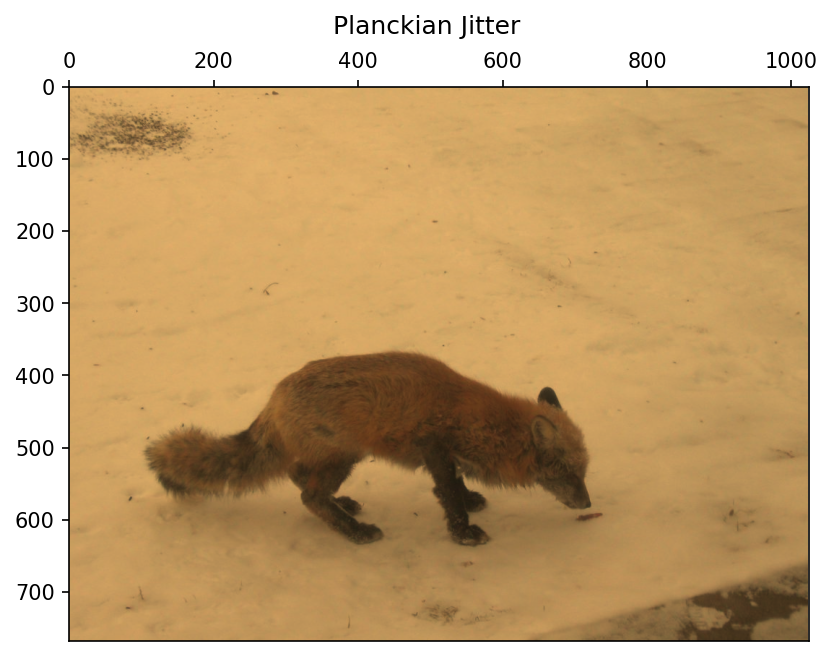

In [8]:
randomplanckianjitter = RandomPlanckianJitter("blackbody", same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomplanckianjitter(img), "Planckian Jitter")

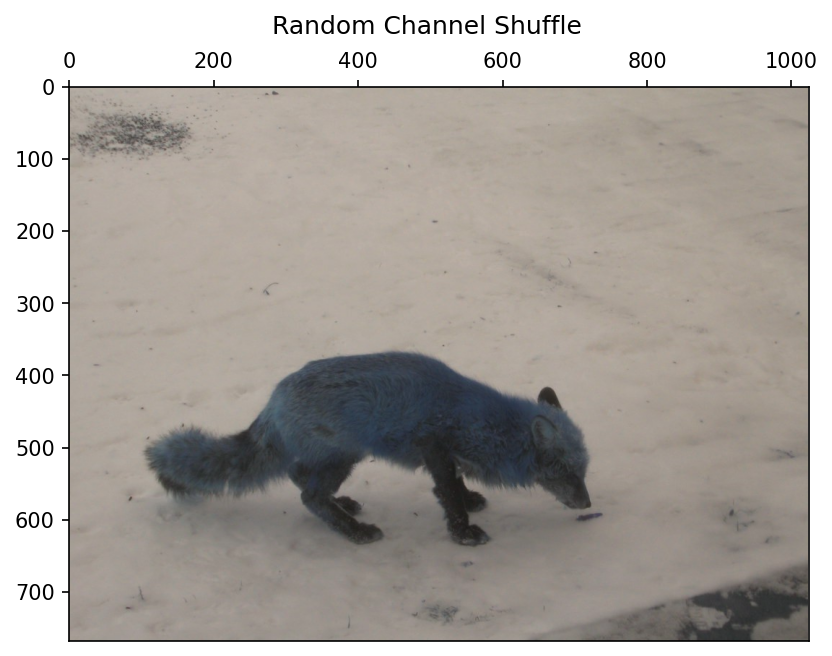

In [12]:
randomchannelshuffle = RandomChannelShuffle(same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomchannelshuffle(img), "Random Channel Shuffle")

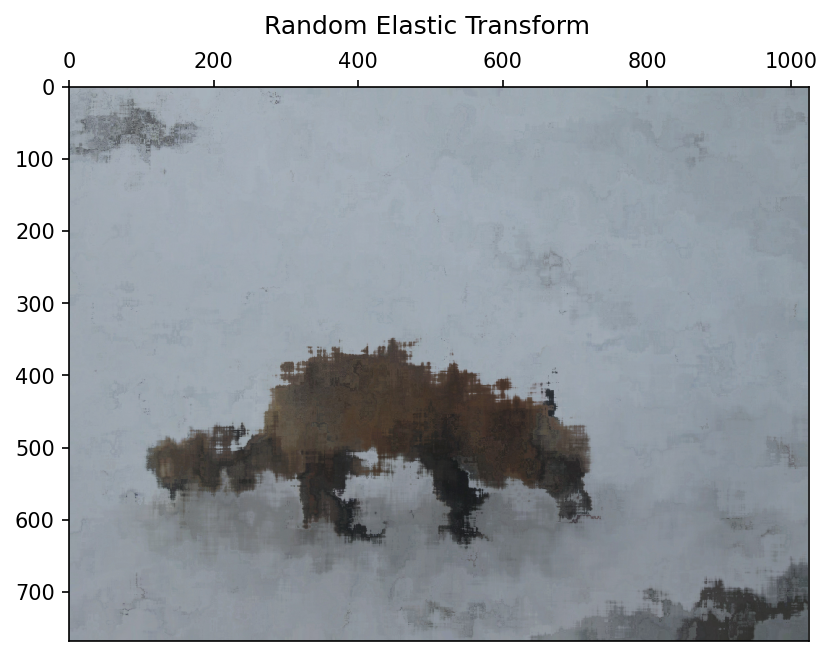

In [16]:
randomelastictransform = RandomElasticTransform(
    (27, 27), (33, 31), (0.5, 1.5), align_corners=True, padding_mode="reflection", same_on_batch=False, keepdim=False, p=1.0
)

plot_tensor(randomelastictransform(img), "Random Elastic Transform")

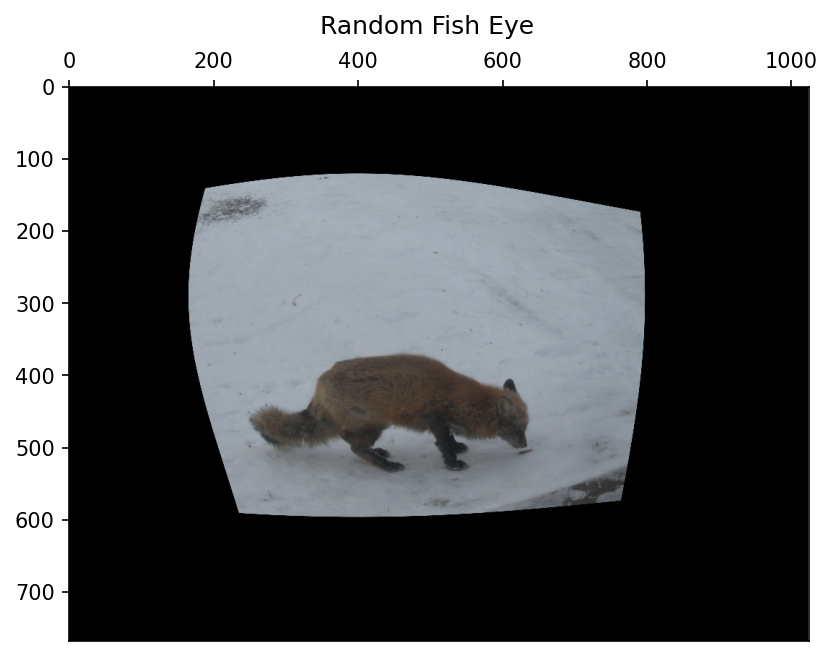

In [21]:
c = kornia.core.tensor([-0.3, 0.3])
g = kornia.core.tensor([0.9, 1.0])
randomfisheye = RandomFisheye(c, c, g, same_on_batch=False, keepdim=False, p=1.0)

plot_tensor(randomfisheye(img), "Random Fish Eye")